In [ ]:
# 30个频率频道 116*116输入   3种不同3dcnn模型的对比  

In [ ]:
# !pip install import-ipynb
# import import_ipynb

%tensorflow_version 1.x
# !pip install numpy==1.16.1

TensorFlow 1.x selected.


In [ ]:

import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from keras.models import Model, Sequential
from keras.layers import Conv1D,Flatten,Conv2D, Dropout, MaxPooling2D, Input,Conv3D, MaxPooling3D, Dense, BatchNormalization, AveragePooling3D
from keras import Input,layers
from keras.layers.merge import concatenate 
from google.colab import drive
from keras.optimizers import Adam,RMSprop,SGD
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')
# %cp -av fromfolder tofolder
# %cd "/content/drive/My Drive/Newdata/"
# from model_functions import *

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 载入数据

In [ ]:
train_data = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_30_116_116.npy')
train_label = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_4_3.npy')
test_data =  np.load('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_30_116_116.npy')
test_label = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_4_3.npy')

train_data = np.reshape(train_data,(2700,30,116,116,1))
test_data = np.reshape(test_data,(900,30,116,116,1)) 

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(2700, 30, 116, 116, 1)
(2700, 4, 3)
(900, 30, 116, 116, 1)
(900, 4, 3)


In [ ]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/strength/nonflipped/all/three/' + str(tmp)+ '.npy',allow_pickle=True)
A = np.reshape(A,(150,30,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/strength/nonflipped/all/three/' + str(i)+ '.npy',allow_pickle=True)
  a = np.reshape(a,(150,30,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(i)+ '.npy',allow_pickle=True)
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 4, 2)

tmp = order[18]
C = np.load('/content/drive/My Drive/strength/nonflipped/all/three/' + str(tmp)+ '.npy',allow_pickle=True)
C = np.reshape(C,(150,30,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/strength/nonflipped/all/three/' + str(i)+ '.npy',allow_pickle=True)
  c = np.reshape(c,(150,30,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(i)+ '.npy',allow_pickle=True)
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 4, 2)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

train_data = A
train_label = B
test_data = C
test_label = D

train_data = np.reshape(train_data,(2700,30,116,1))
test_data = np.reshape(test_data,(900,30,116,1)) 

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

# 模型参数

In [ ]:
#He正态分布初始化方法，参数由0均值，标准差为sqrt(2 / fan_in) 的正态分布产生，其中fan_in权重张量的扇入
def Functional_model():  
   # This returns a tensor# a layer instance is callable on a tensor, and returns a tensor
  x_input = Input(shape=(30,116,116, 1))
  x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x_input) 
  x = layers.MaxPooling3D(pool_size=(3, 3, 3))(x)
  # x = layers.AveragePooling3D(pool_size=(2, 2, 2))(x)
  x = layers.BatchNormalization()(x)
  x= layers.Dropout(0.6)(x)
  x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # x = layers.MaxPooling3D(pool_size=(2, 2, 2))(x)
  x = layers.AveragePooling3D(pool_size=(3, 3, 3))(x)
  x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.5)(x)
  # x = layers.Conv3D(16, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='lecun_uniform')(x)
  # x = layers.MaxPooling3D(pool_size=(2, 2, 2))(x)
  # # x = layers.AveragePooling3D(pool_size=(2, 2, 2))(x)
  # x = layers.BatchNormalization()(x)
  # x = layers.Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='lecun_uniform')(x)
  # # x = layers.MaxPooling3D(pool_size=(2, 2, 2))(x)
  # x = layers.AveragePooling3D(pool_size=(2, 2, 2))(x)
  # x = layers.BatchNormalization()(x)
  x = layers.Flatten()(x)
  # x = layers.Dense(3200, activation='relu', kernel_initializer='lecun_uniform')(x)
  # x = layers.Dense(1600, activation='relu', kernel_initializer='lecun_uniform')(x)
  # x = layers.Dense(800, activation='relu', kernel_initializer='lecun_uniform')(x)
  # x = layers.Dense(400, activation='relu', kernel_initializer='lecun_uniform')(x)
  # x = layers.Dense(32, activation='relu', kernel_initializer='lecun_uniform')(x)
  x = layers.Dense(16, activation='relu', kernel_initializer='lecun_uniform')(x) 
  x = layers.Dense(8, activation='relu', kernel_initializer='lecun_uniform')(x) 
  
  y1 = layers.Dense(3, activation='softmax', name = 'y1')(x)
  y2 = layers.Dense(3, activation='softmax', name = 'y2')(x)
  y3 = layers.Dense(3, activation='softmax', name = 'y3')(x)
  y4 = layers.Dense(3, activation='softmax', name = 'y4')(x)
  # y5 = layers.Dense(3, activation='softmax', name = 'y5')(x)
  # y6 = layers.Dense(3, activation='softmax', name = 'y6')(x)
  # y7 = layers.Dense(3, activation='softmax', name = 'y7')(x)
  # y8 = layers.Dense(3, activation='softmax', name = 'y8')(x)
  # y9 = layers.Dense(3, activation='softmax', name = 'y9')(x)
  # y10 = layers.Dense(3, activation='softmax', name = 'y10')(x)
  # y11 = layers.Dense(3, activation='softmax', name = 'y11')(x)
  # y12 = layers.Dense(3, activation='softmax', name = 'y12')(x)
  # y13 = layers.Dense(3, activation='softmax', name = 'y13')(x)
  # y14 = layers.Dense(3, activation='softmax', name = 'y14')(x)
  # y15 = layers.Dense(3, activation='softmax', name = 'y15')(x)
  # y16 = layers.Dense(3, activation='softmax', name = 'y16')(x) 
  # y17 = layers.Dense(3, activation='softmax', name = 'y17')(x)
  # y18 = layers.Dense(3, activation='softmax', name = 'y18')(x)
  # y19 = layers.Dense(3, activation='softmax', name = 'y19')(x)
  # y20 = layers.Dense(3, activation='softmax', name = 'y20')(x)
  # y21 = layers.Dense(3, activation='softmax', name = 'y21')(x)
  # y22 = layers.Dense(3, activation='softmax', name = 'y22')(x)
  # y23 = layers.Dense(3, activation='softmax', name = 'y23')(x)
  # y24 = layers.Dense(3, activation='softmax', name = 'y24')(x)   
  # y25 = layers.Dense(3, activation='softmax', name = 'y25')(x)   

  # This creates a model that includes
  model = Model(inputs=x_input, outputs=[y1,y2,y3,y4
                                        #  ,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16
                                        #  ,y17,y18,y19,y20,y21,y22,y23,y24,y25
                                         ])
  model.summary() 
  model.compile(optimizer = SGD(lr=0.003),
                loss=['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'
                # ,'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                # 'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                # 'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'
                # ,'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                # 'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                # 'categorical_crossentropy'
                ],
                metrics=['accuracy'])
  return model 

# 跑模型

In [ ]:

num_epochs = 50
batchsize = 6
model = Functional_model()
history = model.fit(train_data, [train_label[:,0],train_label[:,1],train_label[:,2],train_label[:,3]
                                #  ,train_label[:,4],train_label[:,5],train_label[:,6],train_label[:,7],
                                #  train_label[:,8],train_label[:,9],train_label[:,10],train_label[:,11],train_label[:,12],train_label[:,13],train_label[:,14],train_label[:,15]
                                #  ,train_label[:,16],train_label[:,17],train_label[:,18],train_label[:,19],train_label[:,20],train_label[:,21],train_label[:,22],train_label[:,23],
                                #  train_label[:,24]
                                 ], epochs=num_epochs, batch_size=batchsize, verbose=1)


Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 30, 116, 116, 0                                            
__________________________________________________________________________________________________
conv3d_27 (Conv3D)              (None, 27, 113, 113, 195         input_14[0][0]                   
__________________________________________________________________________________________________
max_pooling3d_14 (MaxPooling3D) (None, 9, 37, 37, 3) 0           conv3d_27[0][0]                  
__________________________________________________________________________________________________
batch_normalization_24 (BatchNo (None, 9, 37, 37, 3) 12          max_pooling3d_14[0][0]           
___________________________________________________________________________________________

In [ ]:
# model.metrics_names

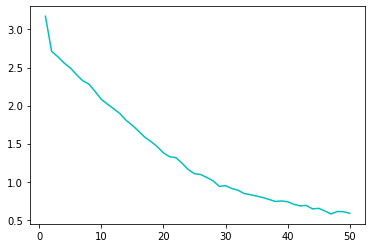

In [ ]:
mse_history = history.history['loss']
# mae_history = history.history['y3_accuracy']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='mse')
# plt.plot(epochs, mae_history, 'm', label='mae')

# plt.savefig('/content/drive/My Drive/original4800_50epo_mse_mae1.png' ,dpi=1200)

In [ ]:
test = model.evaluate(test_data, [test_label[:,0],test_label[:,1],test_label[:,2],test_label[:,3]
                                  # ,test_label[:,4] ,test_label[:,5],test_label[:,6],test_label[:,7],
                                #  test_label[:,8],test_label[:,9],test_label[:,10],test_label[:,11],test_label[:,12],test_label[:,13],test_label[:,14],test_label[:,15]
                                #   ,test_label[:,16],test_label[:,17],test_label[:,18],test_label[:,19],test_label[:,20],test_label[:,21],test_label[:,22],test_label[:,23],
                                #  test_label[:,24]
                                  ], verbose=0)
# print(test)
average = 5
mean = np.mean(test[average:])
print(len(test[average:]))

print(mean)

4
0.4125000014901161


In [ ]:
model.predict(test_data[899:900])

[array([[1.0000000e+00, 2.8864263e-25, 2.0647243e-11]], dtype=float32),
 array([[1.9982869e-17, 3.2378728e-20, 1.0000000e+00]], dtype=float32),
 array([[1.0000000e+00, 8.8592655e-10, 3.5325257e-10]], dtype=float32),
 array([[4.779138e-08, 8.480343e-18, 1.000000e+00]], dtype=float32)]

In [ ]:
print(test_label[899:900])

[[[0 0 1]
  [1 0 0]
  [0 0 1]
  [1 0 0]]]
